In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics 
from scipy import stats
import random

In [2]:
r_wine = pd.read_csv(r"winequality-red.csv",sep=";",encoding='latin-1')

In [3]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
r_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
r_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: xlabel='quality', ylabel='count'>

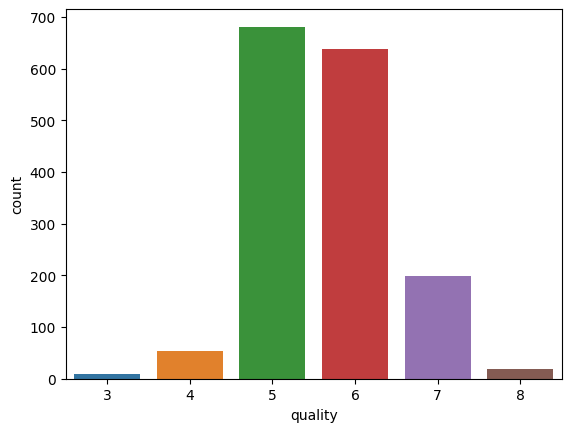

In [6]:
sb.countplot(x="quality",data=r_wine)

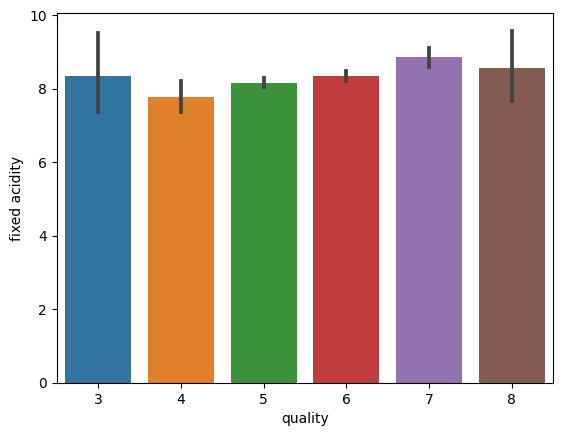

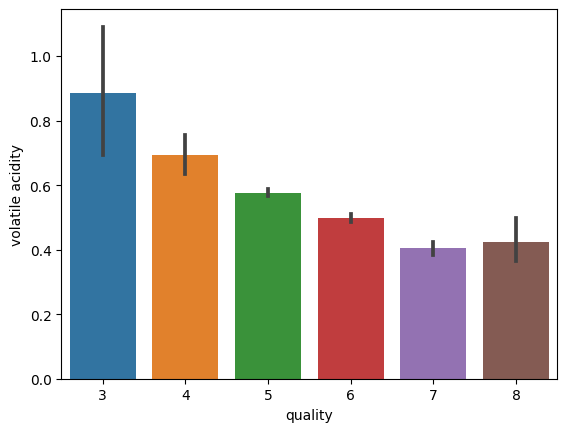

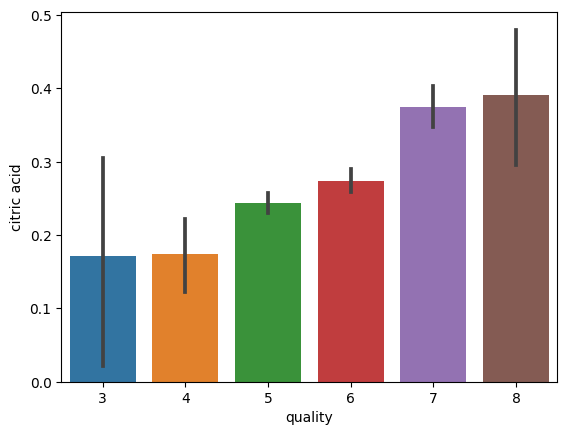

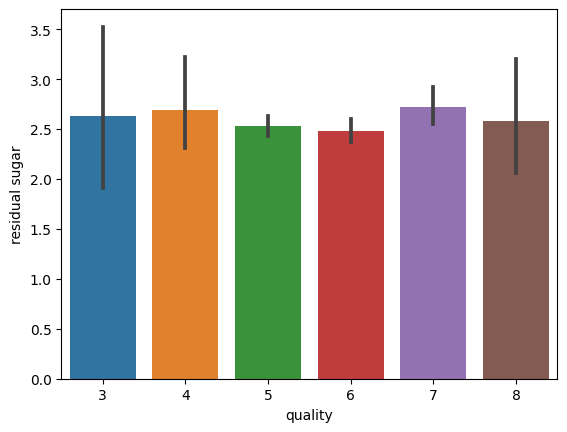

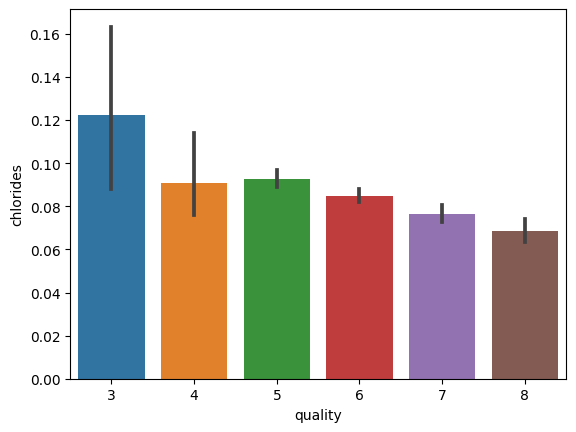

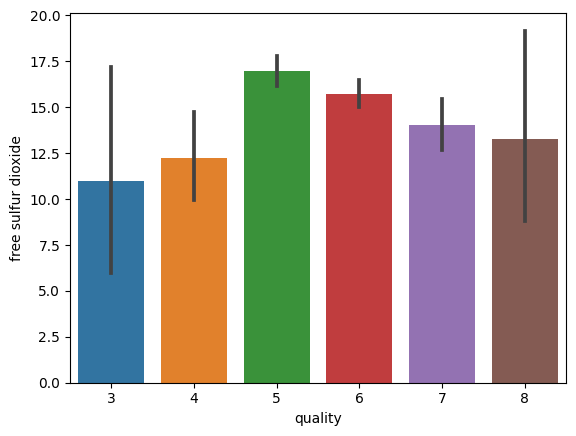

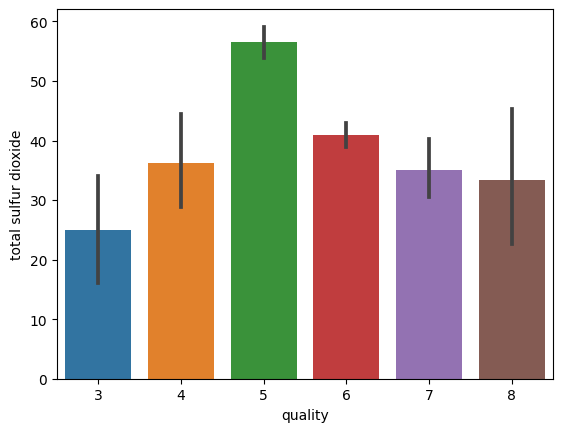

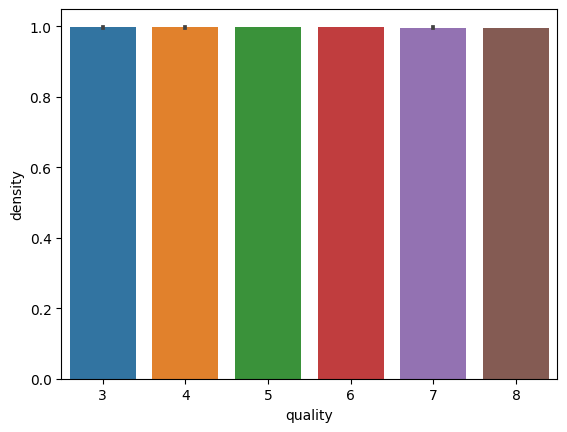

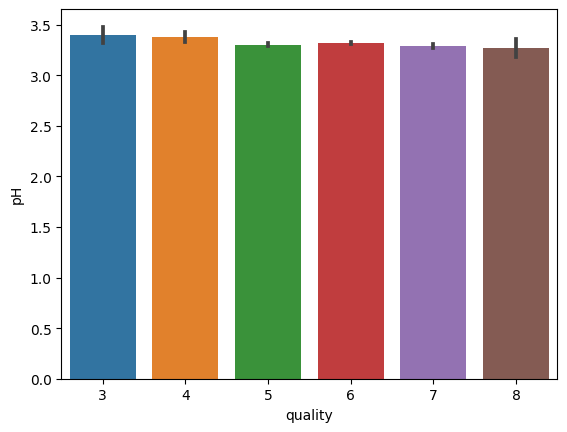

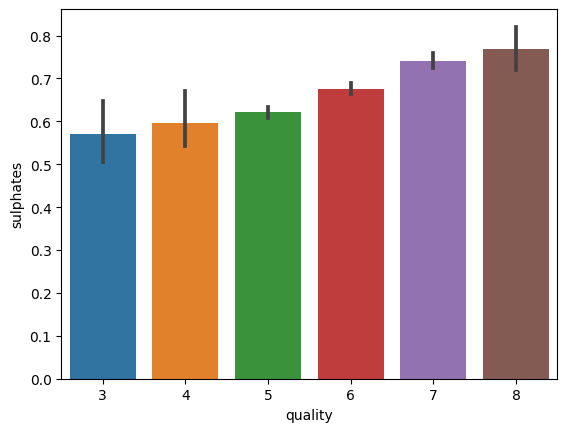

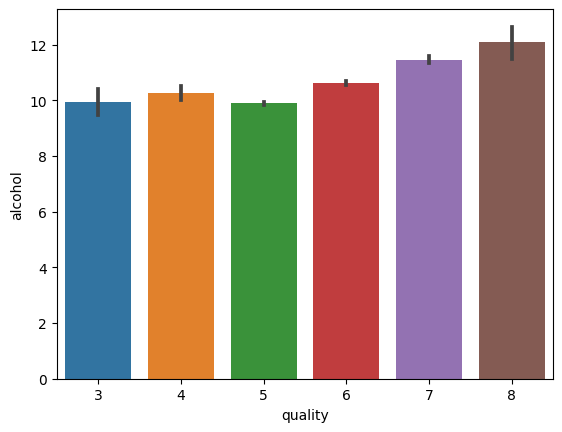

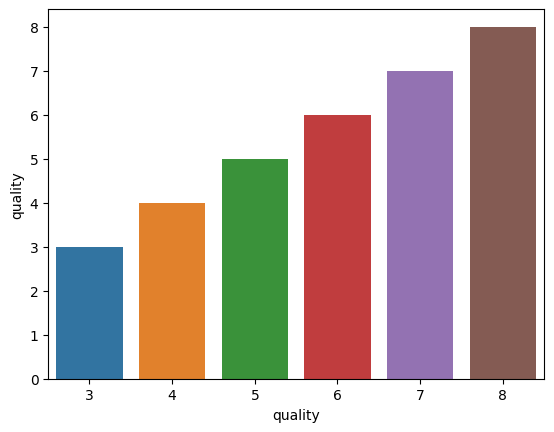

In [7]:
for i in r_wine.columns:
    
    plt.figure(i)
    
    sb.barplot(x="quality",y=i,data=r_wine)

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

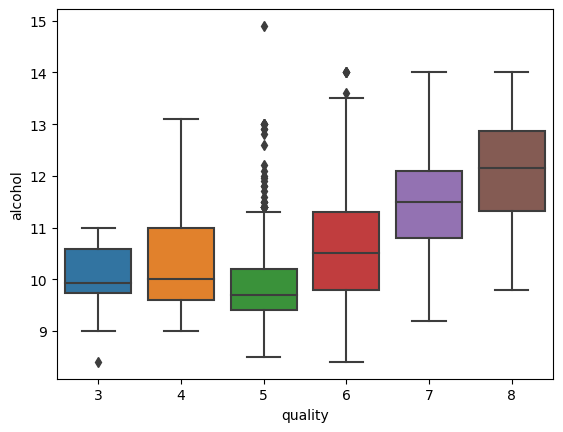

In [8]:
sb.boxplot(x="quality",y="alcohol",data=r_wine)

<AxesSubplot: >

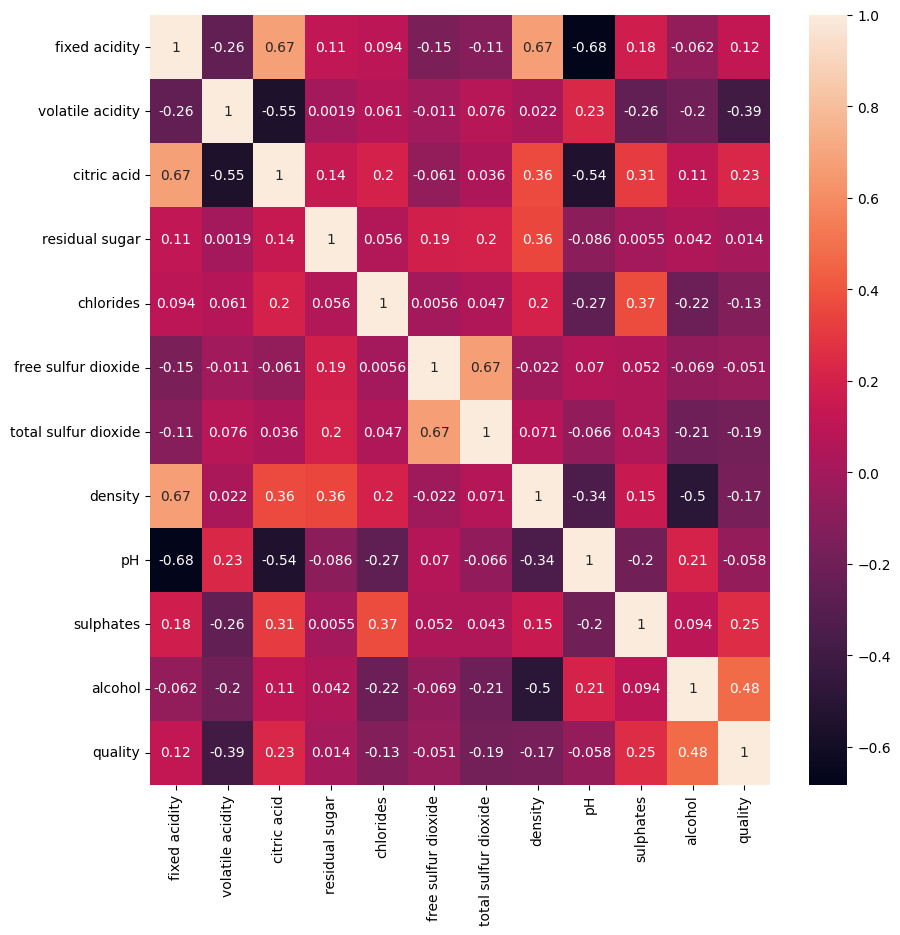

In [9]:
plt.figure(figsize=(10,10))
sb.heatmap(r_wine.corr(),annot=True)

Change the quality to binary

In [10]:
r_wine["quality_bin"] = [1 if x > 6.5 else 0 for x in r_wine["quality"]]

In [11]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [12]:
r_wine["quality_bin"].value_counts()

0    1382
1     217
Name: quality_bin, dtype: int64

<AxesSubplot: xlabel='quality_bin', ylabel='count'>

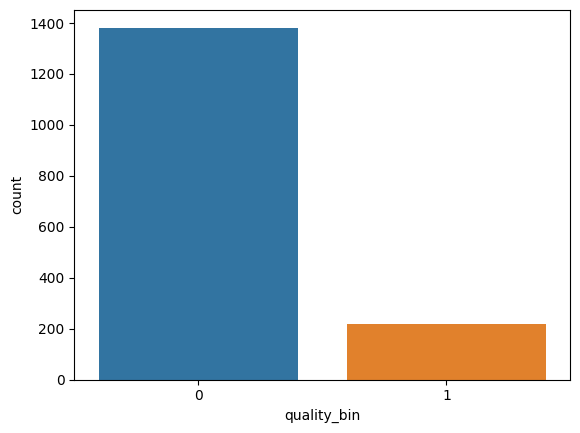

In [13]:
sb.countplot(x="quality_bin",data=r_wine)

<AxesSubplot: >

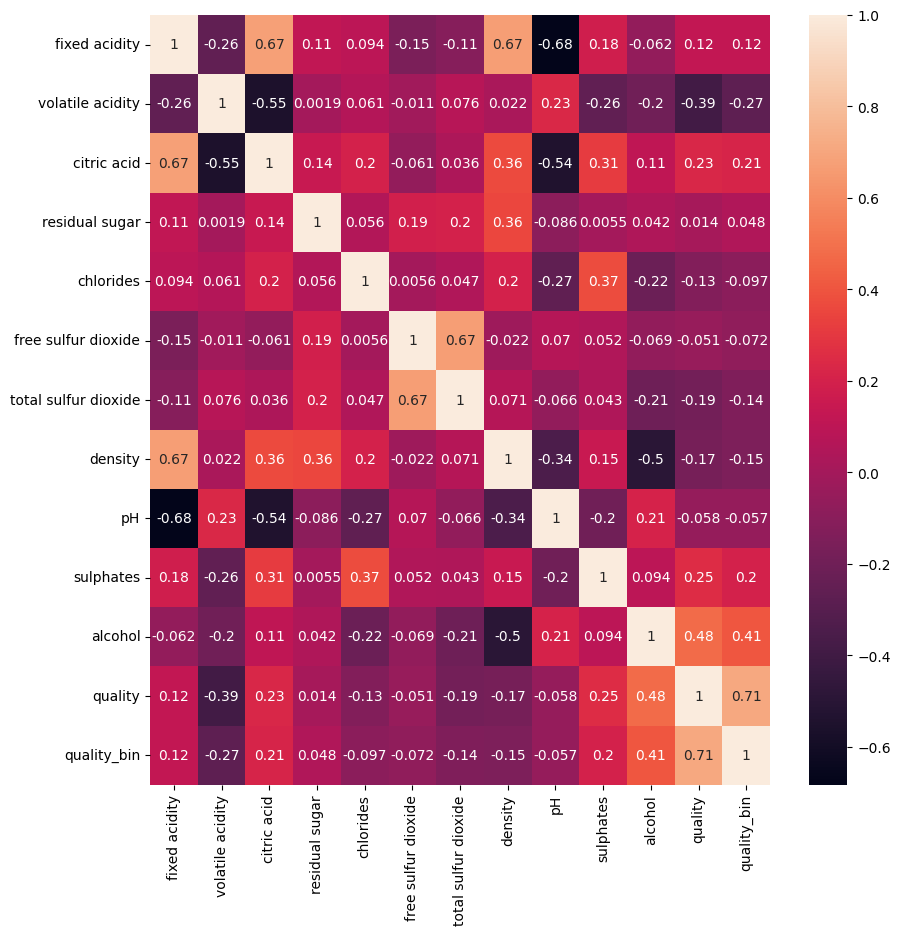

In [14]:
plt.figure(figsize=(10,10))
sb.heatmap(r_wine.corr(),annot=True)

Standardizing the data

In [15]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [17]:
from sklearn.preprocessing import StandardScaler

y = r_wine["quality_bin"]
x = r_wine.drop(["quality","quality_bin"], axis=1)

sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [44]:
#Supervised
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
#Unsupervised
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

Decision trees

In [56]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy: ",dt.score(X_test,y_test))

Accuracy:  0.89375


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       290
           1       0.46      0.73      0.56        30

    accuracy                           0.89       320
   macro avg       0.71      0.82      0.75       320
weighted avg       0.92      0.89      0.90       320



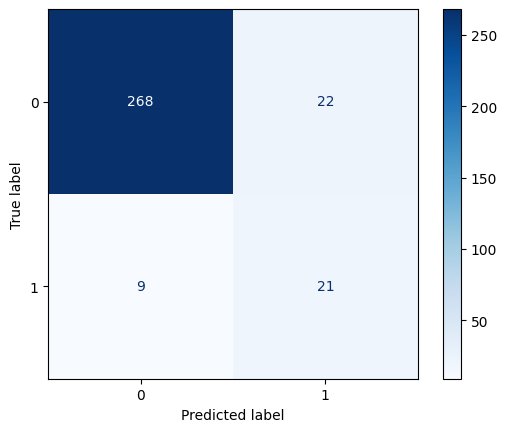

In [50]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(dt,X_test,y_test,cmap="Blues")

MLPClassifier

In [51]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))
print(classification_report(y_test,y_pred))

Score:  0.890625
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       290
           1       0.49      0.70      0.58        30

    accuracy                           0.90       320
   macro avg       0.73      0.81      0.76       320
weighted avg       0.92      0.90      0.91       320



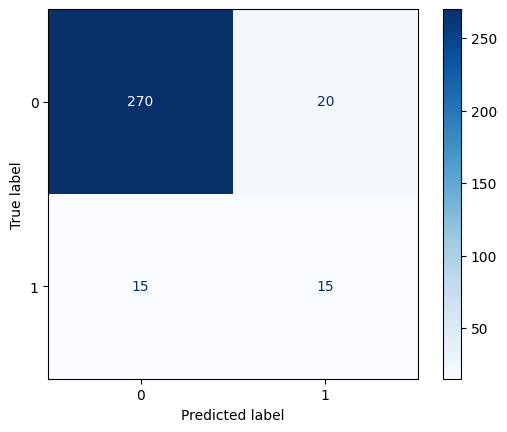

In [52]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(clf,X_test,y_test,cmap="Blues")

KNN Classifier

In [55]:
knn=KNeighborsClassifier() 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('The accuracy of the KNN is',knn.score(X_test,y_test))

The accuracy of the KNN is 0.915625


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       290
           1       0.55      0.57      0.56        30

    accuracy                           0.92       320
   macro avg       0.75      0.76      0.76       320
weighted avg       0.92      0.92      0.92       320



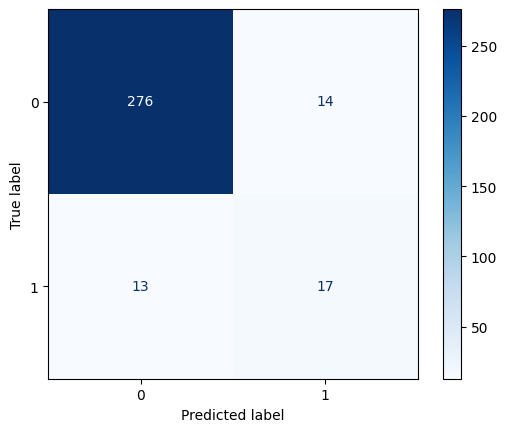

In [40]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(knn,X_test,y_test,cmap="Blues")

Logistic Regression

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('The accuracy of the KNN is',lr.score(X_test,y_test))

The accuracy of the KNN is 0.903125


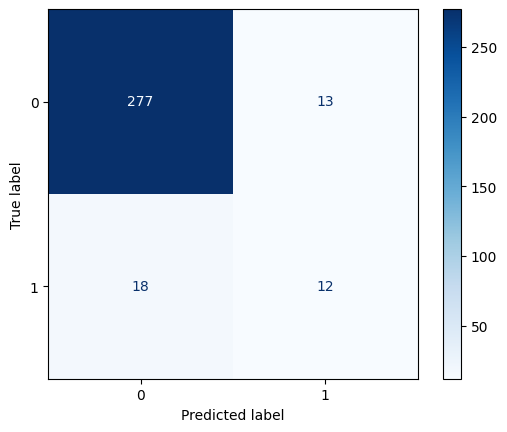

In [59]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(lr,X_test,y_test,cmap="Blues")

We have unbalanced data, so even though the accuracy is quite good, all the models have a bias towards the class with the most entries.<p>
let's remake the quality_bin to better represent the data

In [60]:
r_wine["quality_bin"] = [1 if x > 5 else 0 for x in r_wine["quality"]]

In [61]:
r_wine["quality_bin"].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler

y = r_wine["quality_bin"]
x = r_wine.drop(["quality","quality_bin"], axis=1)

sc = StandardScaler()
x = sc.fit_transform(x)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

Decision Tree

In [64]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy: ",dt.score(X_test,y_test))

Accuracy:  0.765625


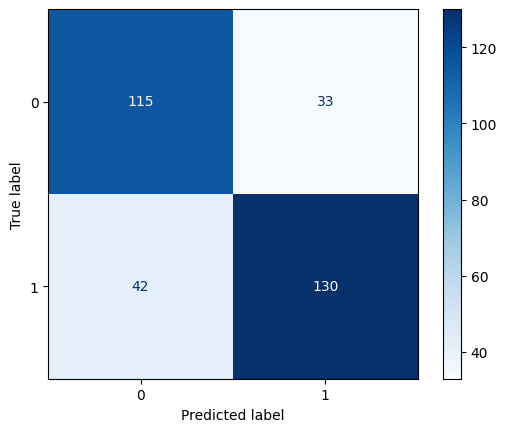

In [65]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(dt,X_test,y_test,cmap="Blues")

Multi layer precepton

In [66]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))
print(classification_report(y_test,y_pred))

Score:  0.734375
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       148
           1       0.80      0.76      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



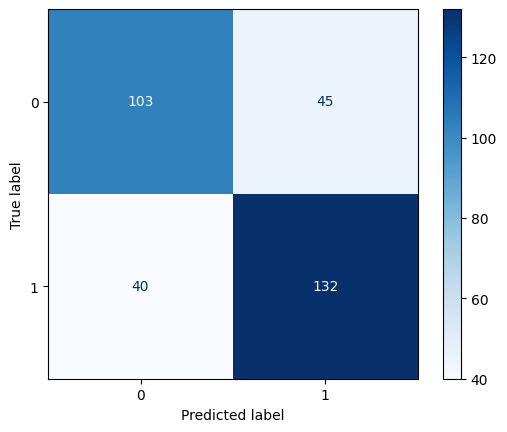

In [67]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(clf,X_test,y_test,cmap="Blues")

Knn

In [68]:
knn=KNeighborsClassifier() 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('The accuracy of the KNN is',knn.score(X_test,y_test))

The accuracy of the KNN is 0.7125


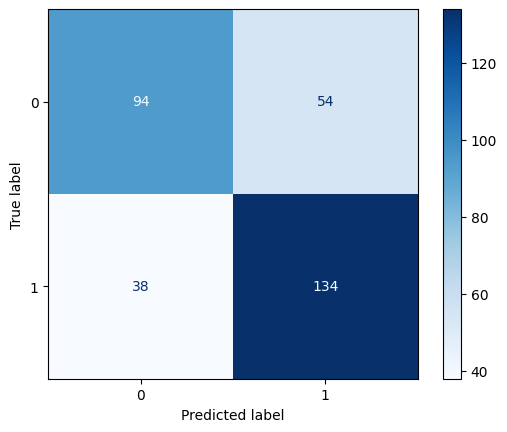

In [69]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(knn,X_test,y_test,cmap="Blues")

In [70]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('The accuracy of the KNN is',lr.score(X_test,y_test))

The accuracy of the KNN is 0.75


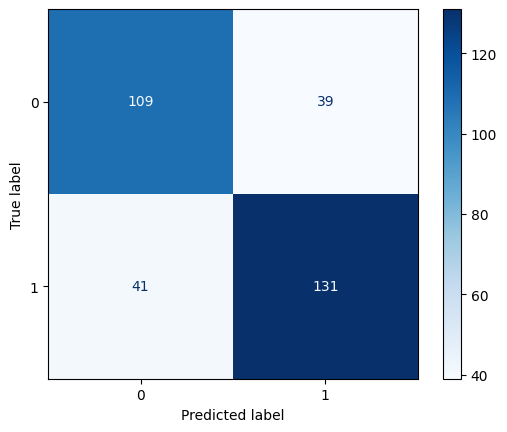

In [71]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(lr,X_test,y_test,cmap="Blues")

The results are promising, but an accurate model would require a more extensive dataset. 